In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit 


In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)


In [3]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [8]:
titanic['class']=titanic['pclass'].map({1: 'First', 2: "Second", 3: "Third"})

In [16]:
titanic.embarked.value_counts()
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q":"Queensland", "S": "Southampton"})

In [17]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [18]:
titanic["alive"]= titanic.survived.map({0:"No", 1:"Yes"})

In [20]:
titanic.alive

0       No
1      Yes
2      Yes
3      Yes
4       No
5       No
6       No
7       No
8      Yes
9      Yes
10     Yes
11     Yes
12      No
13      No
14      No
15     Yes
16      No
17     Yes
18      No
19     Yes
20      No
21     Yes
22     Yes
23     Yes
24      No
25     Yes
26      No
27      No
28     Yes
29      No
      ... 
861     No
862    Yes
863     No
864     No
865    Yes
866    Yes
867     No
868     No
869    Yes
870     No
871    Yes
872     No
873     No
874    Yes
875    Yes
876     No
877     No
878     No
879    Yes
880    Yes
881     No
882     No
883     No
884     No
885     No
886     No
887    Yes
888     No
889    Yes
890     No
Name: alive, Length: 891, dtype: object

In [21]:
titanic = titanic.drop(["name", "ticket", "cabin", "embarked"], axis=1)

In [22]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,No
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,Yes
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,Yes
3,1,1,female,35.0,1,0,53.1000,First,Southampton,Yes
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,No
5,0,3,male,NaN,0,0,8.4583,Third,Queensland,No
6,0,1,male,54.0,0,0,51.8625,First,Southampton,No
7,0,3,male,2.0,3,1,21.0750,Third,Southampton,No
8,1,3,female,27.0,0,2,11.1333,Third,Southampton,Yes
9,1,2,female,14.0,1,0,30.0708,Second,Cherbourg,Yes


In [23]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'embark_town', 'alive'],
      dtype='object')

In [24]:
titanic.to_csv("titanic.csv")

In [30]:
titanic.groupby("class")['fare'].sum()

class
First     18177.4125
Second     3801.8417
Third      6714.6951
Name: fare, dtype: float64

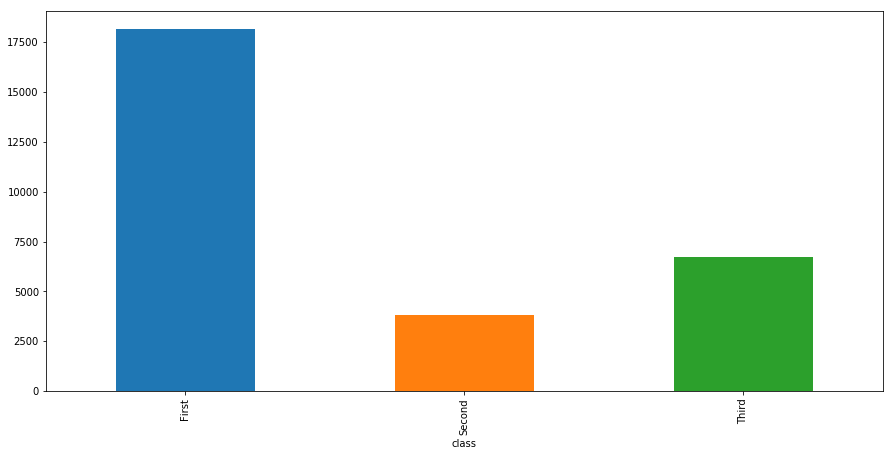

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
titanic.groupby("class")["fare"].sum().plot(kind='bar')


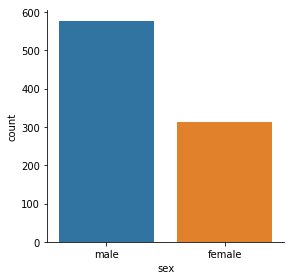

In [32]:
sns.factorplot(x="sex", data=titanic, kind='count')

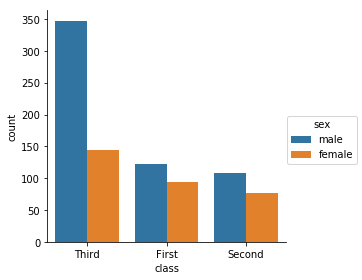

In [33]:
sns.factorplot(x="class", hue="sex", data=titanic, kind='count')